In [1]:
import seaborn as sns
import matplotlib.transforms as transforms
from datetime import datetime
from skimage.io import imsave
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
#%plt.style.use("v_paper")
import pandas as pd
from scipy.io import loadmat
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import re
from statsmodels.stats.anova import anova_lm
import os
import os.path
import statsmodels.api as smapi
import sys
import warnings
from sklearn.linear_model import LinearRegression
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
import statsmodels as sm
import scipy
from pathlib import Path

In [2]:
Compdf=pd.read_pickle("Compdf.pkl")

In [3]:
Regionsdf=pd.read_pickle("Regionsdf.pkl")

In [4]:
GoodICFiles=pd.read_pickle("GoodICsdf.pkl")

In [5]:
Compdf=Compdf.query('CompID!=" "')
Compdf=Compdf.query('CompID!=""')
Compdf=Compdf.query('CompID!=""')
#Regionsdf=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
Compdf=Compdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10" or GAL4=="TH" or GAL4=="Trh" or GAL4=="TDC"')                   
Compdf=Compdf.groupby('CompID').filter(lambda x : len(x)>3)

In [6]:
#CompOrder=pd.read_csv('Z:\GrunwaldKadow_group\Sophie\WalkProject\AllCompIDOrderedVF.txt',header=None,keep_default_na=False)
CompOrder=['AL','PN','MultiGl','PNv','PN-KC','KCab','KCapbp','KCg','Beta1Betap1','Beta2Betap2','Gamma1','Gamma2','Gamma3','Gamma4','Gamma5','SLP-alpha','Alpha1','Alpha2','Alpha3','Alphap3','SCLtract','CLvert','CL?','CL-LH','CL','SMPm','SMPd-PI','PPL-SMP','SMPl-SIP','SIP-SMPd','SIP-FB','FB-SN','SLP-SMPproj','SLP-SMP','SLP','LH-SLP','FBcol','FBlayv','FBlaym','FBlayd','NO','PB','PBfull','PB-DA','BU-PBl-EB','PB-EB','EB','EB-DA','AOTU-BU','IB','ATL','M-Omega','SPS','IPS-Y','LAL-PS','PPM2-LW','PPM2-VI','AVLPprojm','AVLPm','AVLPshell','VLPl','PI','PI-PRW','PRW','PRW-SLP','PENP-CL','GNGl','OL','OL-PENP']
Compdf=Compdf[Compdf.CompID.isin(CompOrder)]

In [7]:
Compdf[Compdf['R2ForcedWalk']>0]['FR'].unique()

array([10., nan, 50.,  5.,  2.])

In [8]:
Compdf[Compdf['R2ForcedWalk']>0].query('FR==50')['expID'].unique()

array(['B765', 'B766', 'B767', 'B768'], dtype=object)

In [9]:
NewCompOrderList=[a for a in CompOrder if a in list(Compdf[Compdf['R2ForcedWalk']>0].groupby('CompID').filter(lambda x : len(x)>3).CompID.unique())]
L= np.argsort(NewCompOrderList)
               
L2=np.argsort(L)    

In [10]:
len(NewCompOrderList),len(CompOrder)

(55, 69)

In [14]:
NewCompOrderList

['AL',
 'PN',
 'MultiGl',
 'PNv',
 'PN-KC',
 'KCab',
 'KCapbp',
 'KCg',
 'Beta1Betap1',
 'Beta2Betap2',
 'Gamma1',
 'Gamma2',
 'Gamma3',
 'Gamma4',
 'Gamma5',
 'Alpha1',
 'Alpha2',
 'Alpha3',
 'Alphap3',
 'CLvert',
 'CL-LH',
 'CL',
 'SMPm',
 'PPL-SMP',
 'SMPl-SIP',
 'SIP-FB',
 'FB-SN',
 'SLP-SMPproj',
 'SLP',
 'FBcol',
 'FBlaym',
 'FBlayd',
 'PBfull',
 'PB-DA',
 'EB',
 'AOTU-BU',
 'ATL',
 'M-Omega',
 'SPS',
 'IPS-Y',
 'LAL-PS',
 'PPM2-LW',
 'PPM2-VI',
 'AVLPprojm',
 'AVLPm',
 'AVLPshell',
 'VLPl',
 'PI',
 'PI-PRW',
 'PRW',
 'PRW-SLP',
 'PENP-CL',
 'GNGl',
 'OL',
 'OL-PENP']

In [11]:
Compdf=Compdf[Compdf.CompID.isin(NewCompOrderList)]

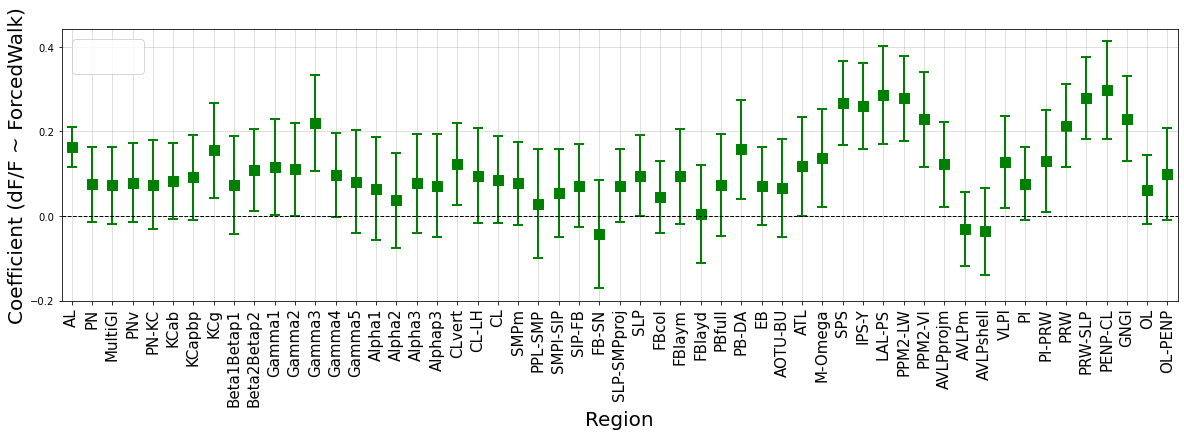

In [12]:
lin_reg = smf.ols(formula="CoefForcedWalk ~ CompID+UAS", data=Compdf[Compdf['R2ForcedWalk']>0]).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ ForcedWalk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(NewCompOrderList, 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\CoefForcedWalkwithCompIDReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

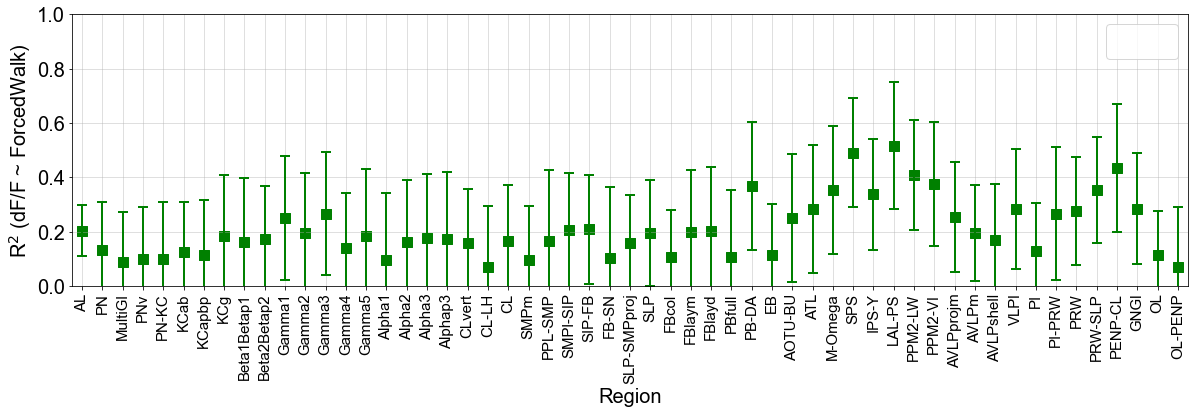

In [15]:
lin_reg = smf.ols(formula="R2ForcedWalk ~ CompID+UAS", data=Compdf[Compdf['R2ForcedWalk']>0]).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ ForcedWalk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(NewCompOrderList, 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.ylim([0,1])
ax.grid(True,alpha=0.5)
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\R2WalkwithCompIDReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

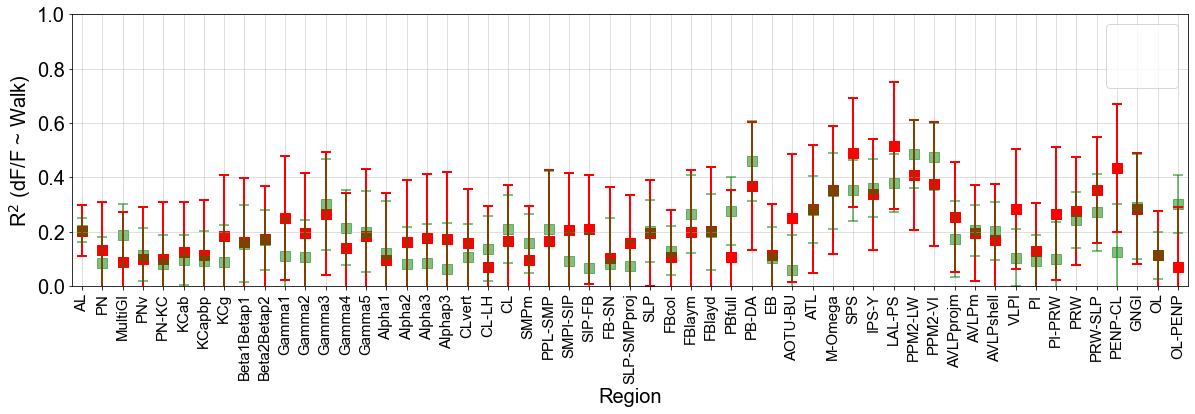

In [20]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20   


lin_reg = smf.ols(formula="R2ForcedWalk ~ CompID+UAS", data=Compdf).fit()
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")


lin_reg = smf.ols(formula="R2Walk ~ CompID+UAS", data=Compdf).fit()
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')

plt.xlabel('Region',fontsize=20)
#plt.ylabel('R$^2$ (dF/F ~ ForcedWalk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',alpha=0.5,label="Mixed model for fly ID")



plt.grid(b=None)
_ = ax.set_xticklabels(NewCompOrderList, 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.ylim([0,1])
ax.grid(True,alpha=0.5)
plt.savefig('C:\\Users\\Soso\\Desktop\\Fig7f.svg')
#ax.set_xticks([])
#ax.set_yticks([])

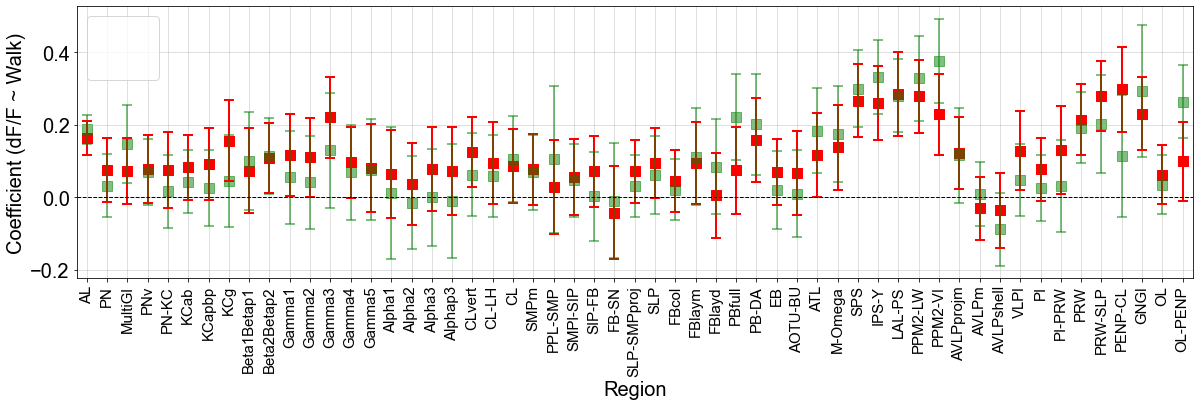

In [21]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20   


lin_reg = smf.ols(formula="CoefForcedWalk ~ CompID+UAS", data=Compdf).fit()
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")


lin_reg = smf.ols(formula="CoefWalk ~ CompID+UAS", data=Compdf).fit()
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')

plt.xlabel('Region',fontsize=20)
#plt.ylabel('R$^2$ (dF/F ~ ForcedWalk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',alpha=0.5,label="Mixed model for fly ID")



plt.grid(b=None)
_ = ax.set_xticklabels(NewCompOrderList, 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)

ax.grid(True,alpha=0.5)
plt.savefig('C:\\Users\\Soso\\Desktop\\Fig7e.svg')
#ax.set_xticks([])
#ax.set_yticks([])

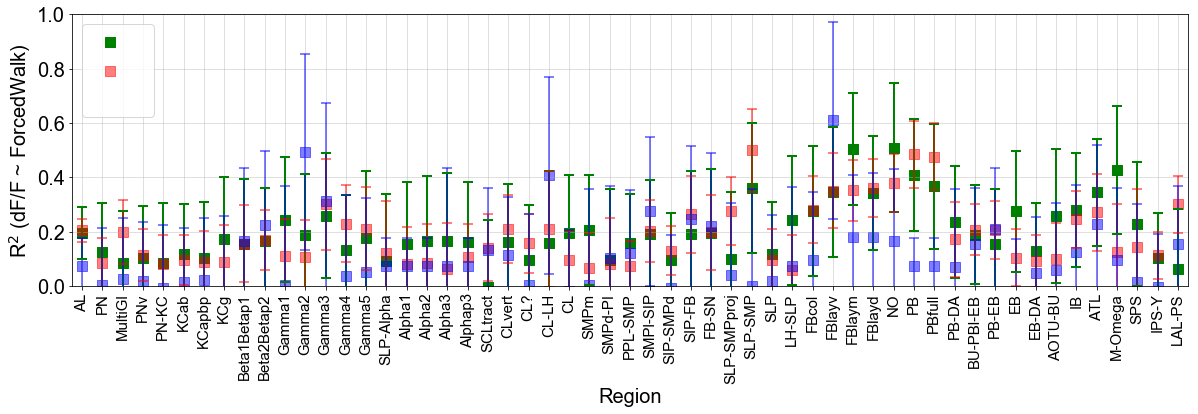

In [13]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20   


lin_reg = smf.ols(formula="R2ForcedWalk ~ CompID+UAS", data=Compdf).fit()
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ ForcedWalk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")


lin_reg = smf.ols(formula="R2Walk ~ CompID+UAS", data=Compdf).fit()
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')

plt.xlabel('Region',fontsize=20)
#plt.ylabel('R$^2$ (dF/F ~ ForcedWalk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='r',alpha=0.5,label="Mixed model for fly ID")

lin_reg = smf.ols(formula="R2Flail ~ CompID+UAS", data=Compdf).fit()
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='b', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')

plt.xlabel('Region',fontsize=20)
#plt.ylabel('R$^2$ (dF/F ~ ForcedWalk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='b',alpha=0.5,label="Mixed model for fly ID")

plt.grid(b=None)
_ = ax.set_xticklabels(list(CompOrder[0]), 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.ylim([0,1])
ax.grid(True,alpha=0.5)
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\R2ForcedgSpontrWalkwithCompIDReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

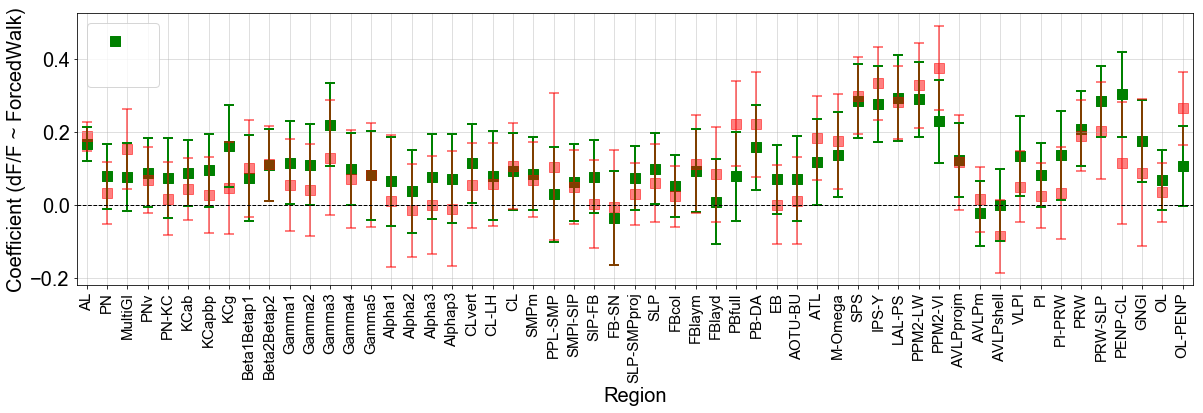

In [14]:
lin_reg = smf.ols(formula="CoefForcedWalk ~ CompID+UAS", data=Compdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")

lin_reg = smf.ols(formula="CoefWalk ~ CompID+UAS", data=Compdf).fit()
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')




ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0),alpha=0.5,
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(NewCompOrderList, 
                      rotation=90, fontsize=15)
plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ ForcedWalk)',fontsize=20)
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\Fig7CoefForcedWalkgSpontrwithCompIDReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

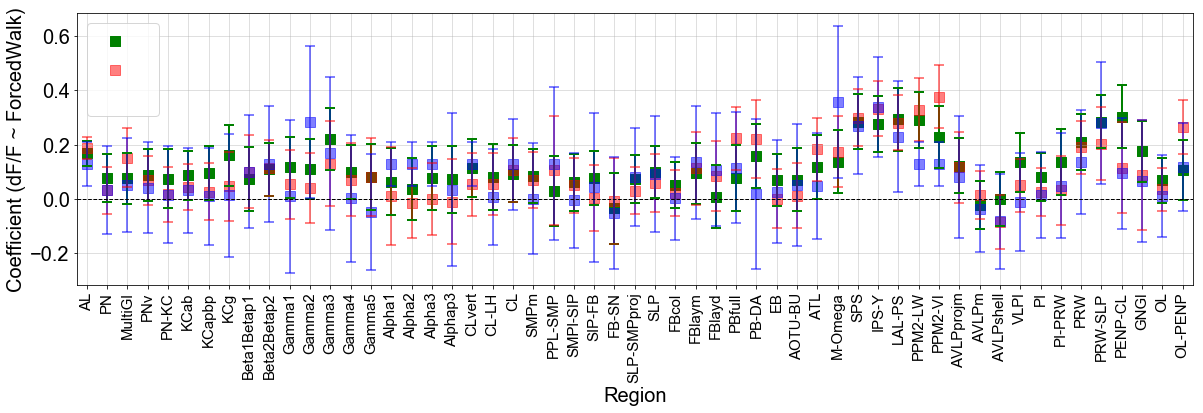

In [15]:
lin_reg = smf.ols(formula="CoefForcedWalk ~ CompID+UAS", data=Compdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")

lin_reg = smf.ols(formula="CoefWalk ~ CompID+UAS", data=Compdf).fit()
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')




ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0),alpha=0.5,
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")

lin_reg = smf.ols(formula="CoefFlail ~ CompID+UAS", data=Compdf).fit()
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[L2]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': np.array(err_seriesgsum)[L2.astype(int)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[L2]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='b', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')




ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0),alpha=0.5,
          y=coef_df['coef'], color='b',label="Mixed model for fly ID")

plt.grid(b=None)
_ = ax.set_xticklabels(NewCompOrderList, 
                      rotation=90, fontsize=15)
plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ ForcedWalk)',fontsize=20)
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\CoefForcedWalkgSpontrwithCompIDReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

In [16]:
RegionNamesList=sorted(Regionsdf.RegionNames.unique())

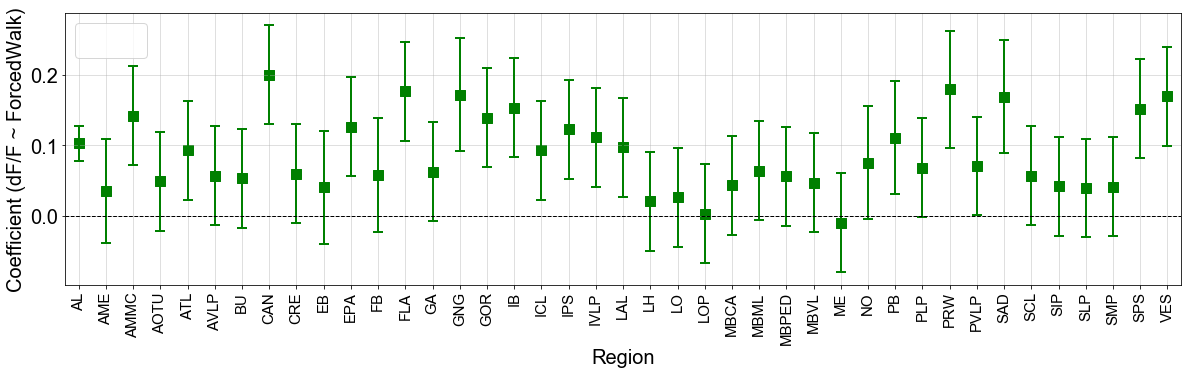

In [17]:
lin_reg = smf.ols(formula="CoefForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ ForcedWalk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(RegionNamesList, 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\CoefForcedWalkRegionsPANReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

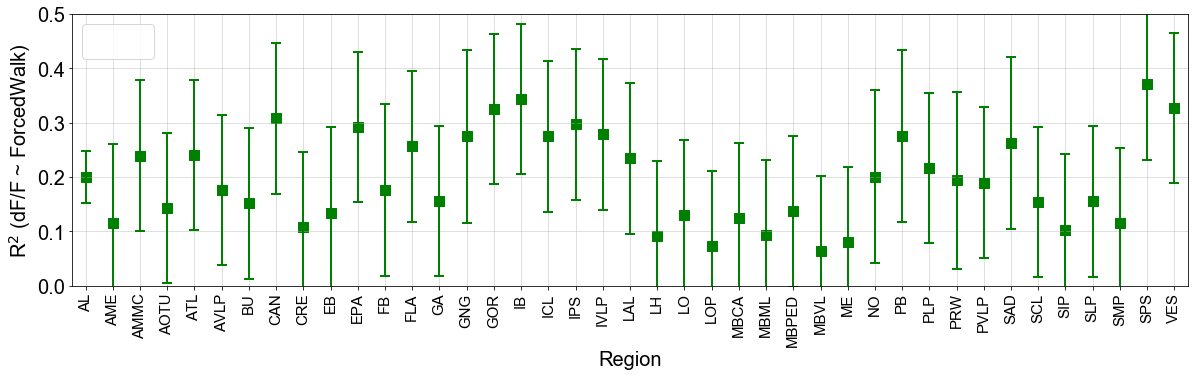

In [18]:
lin_reg = smf.ols(formula="R2ForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ ForcedWalk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(RegionNamesList, 
                      rotation=90, fontsize=15)

plt.ylim([0,0.5])
ax.grid(True,alpha=0.5)
#ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\R2ForcedWalkRegionsPANReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

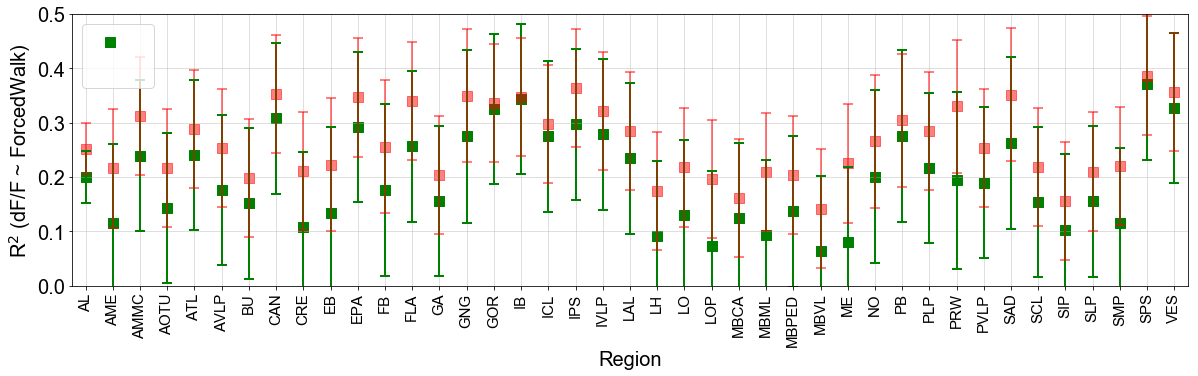

In [19]:
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    

lin_reg = smf.ols(formula="R2ForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')).fit()
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")

lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')).fit()
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')



plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ ForcedWalk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), alpha=0.5,
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(RegionNamesList, 
                      rotation=90, fontsize=15)

plt.ylim([0,0.5])
ax.grid(True,alpha=0.5)
#ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\Fig7R2ForcedWalkgSpontrRegionsPANReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

In [20]:
Regionsdf.loc[Regionsdf['R2ForcedWalk']>0,'GAL4'].unique()

array(['GMR57C10', 'Nsyb', 'TH', 'Trh', 'TDC'], dtype=object)

In [21]:
Compdf.loc[Compdf['R2ForcedWalk']>0,'GAL4'].unique()

array(['GMR57C10', 'Nsyb', 'TH', 'Trh', 'TDC'], dtype=object)

In [22]:
Regionsdf.loc[Regionsdf['R2ForcedWalk']>0,'expID'].unique()

array(['B1045', 'B1049', 'B1000', 'B675', 'B676', 'B1003', 'B677', 'B679',
       'B902', 'B903', 'B377', 'B378', 'B765', 'B766', 'B767', 'B768',
       'B1055', 'B351', 'B352', 'B353', 'B355', 'B358', 'B701', 'B1248',
       'B1251', 'B1260', 'B1262', 'B1269'], dtype=object)

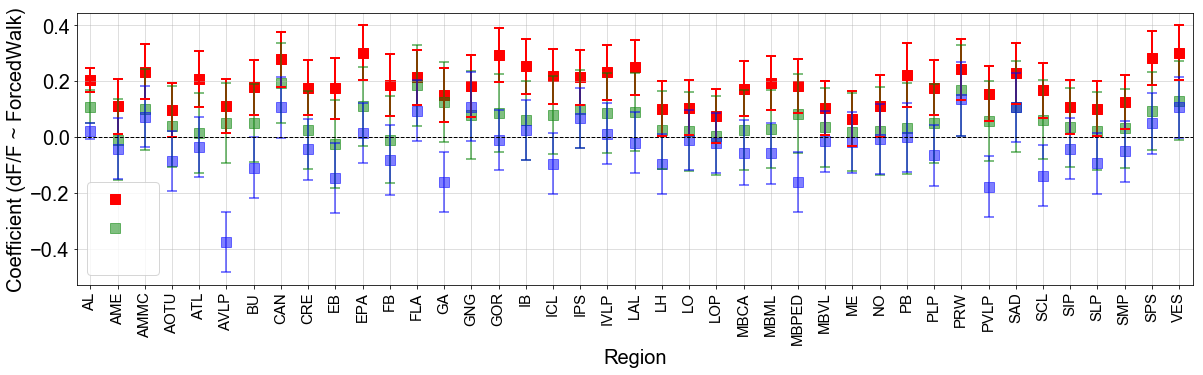

In [23]:
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20   

lin_reg = smf.ols(formula="CoefForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="TH"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")


lin_reg = smf.ols(formula="CoefForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="TDC"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), alpha=0.5,
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")

lin_reg = smf.ols(formula="CoefForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="Trh"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='b', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]),alpha=0.5, 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='b',label="Mixed model for fly ID")





plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ ForcedWalk)',fontsize=20)


plt.grid(b=None)
_ = ax.set_xticklabels(RegionNamesList, 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\CoefAminesForcedWalkRegionsReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

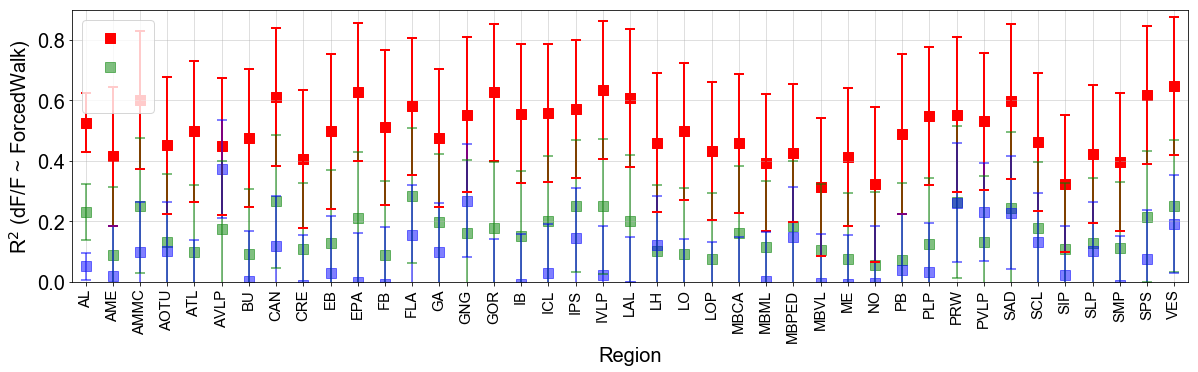

In [24]:
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20   

lin_reg = smf.ols(formula="R2ForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="TH"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")


lin_reg = smf.ols(formula="R2ForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="TDC"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), alpha=0.5,
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")

lin_reg = smf.ols(formula="R2ForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="Trh"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='b', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]),alpha=0.5, 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='b',label="Mixed model for fly ID")





plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ ForcedWalk)',fontsize=20)


plt.grid(b=None)
_ = ax.set_xticklabels(RegionNamesList, 
                      rotation=90, fontsize=15)
plt.ylim([0,0.9])
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7R2aminesForcedWalkRegionsReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

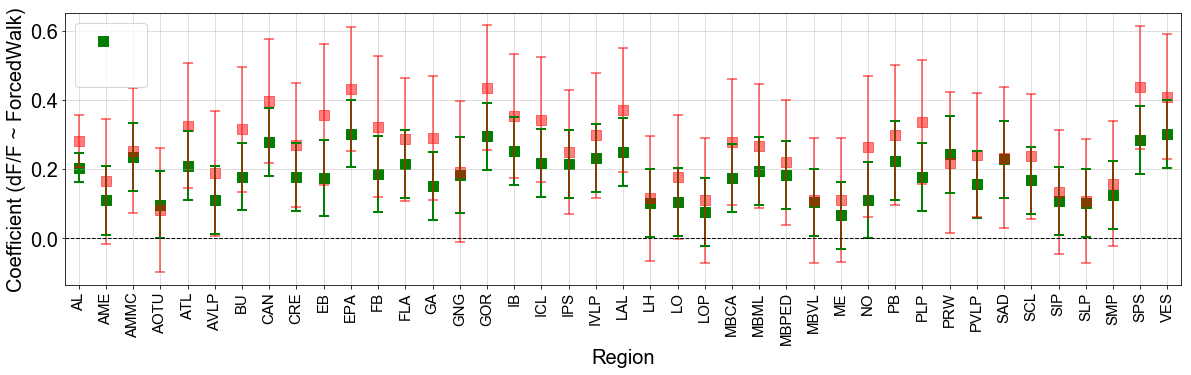

In [25]:
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20   

lin_reg = smf.ols(formula="CoefForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="TH"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")


lin_reg = smf.ols(formula="CoefWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="TH"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), alpha=0.5,
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")


plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ ForcedWalk)',fontsize=20)


plt.grid(b=None)
_ = ax.set_xticklabels(RegionNamesList, 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\Fig7CoefTHForcedWalkgRegionsReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

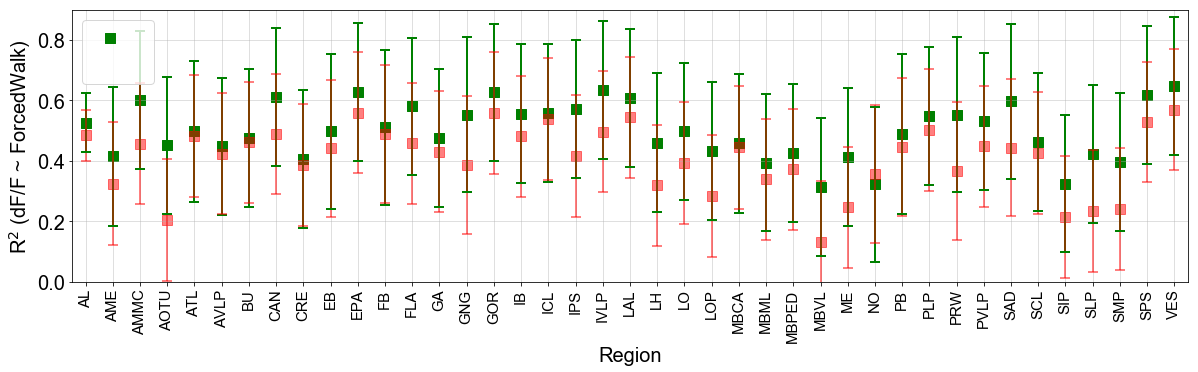

In [26]:
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20   

lin_reg = smf.ols(formula="R2ForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="TH"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")


lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="TH"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), alpha=0.5,
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")


plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ ForcedWalk)',fontsize=20)


plt.grid(b=None)
_ = ax.set_xticklabels(RegionNamesList, 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
plt.ylim([0,0.9])
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\Fig7R2THForcedWalkgRegionsReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

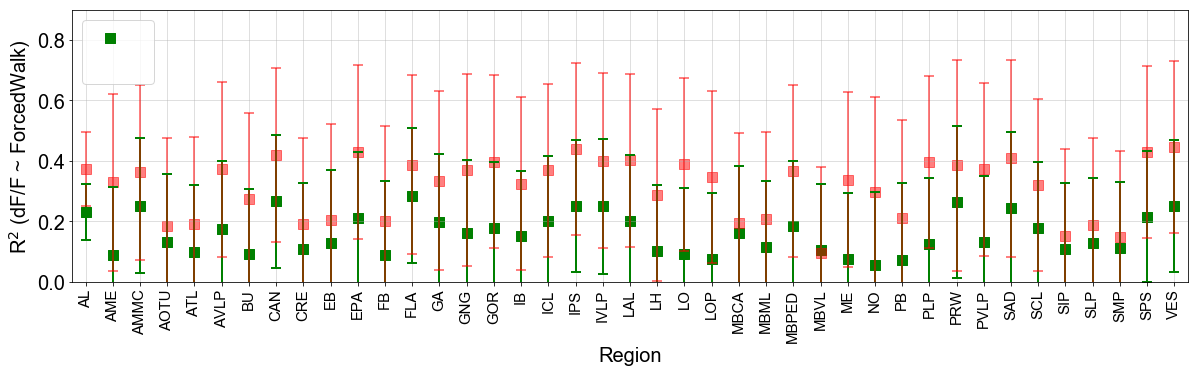

In [27]:
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20   

lin_reg = smf.ols(formula="R2ForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="TDC"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")


lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="TDC"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), alpha=0.5,
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")


plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ ForcedWalk)',fontsize=20)


plt.grid(b=None)
_ = ax.set_xticklabels(RegionNamesList, 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
plt.ylim([0,0.9])
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\Fig7R2TDCForcedWalkgRegionsReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

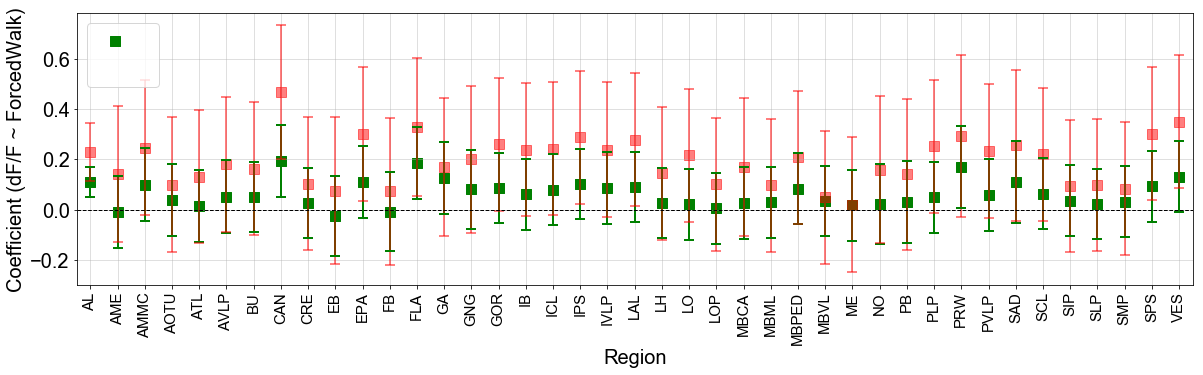

In [28]:
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20   

lin_reg = smf.ols(formula="CoefForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="TDC"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")


lin_reg = smf.ols(formula="CoefWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="TDC"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), alpha=0.5,
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")


plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ ForcedWalk)',fontsize=20)


plt.grid(b=None)
_ = ax.set_xticklabels(RegionNamesList, 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\Fig7CoefTDCForcedWalkgRegionsReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

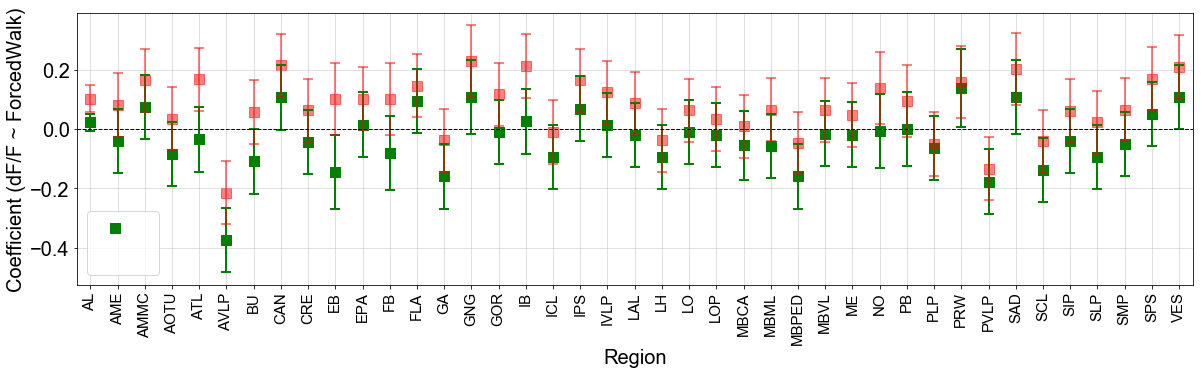

In [29]:
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20   

lin_reg = smf.ols(formula="CoefForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="Trh"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")


lin_reg = smf.ols(formula="CoefWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="Trh"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), alpha=0.5,
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")


plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ ForcedWalk)',fontsize=20)


plt.grid(b=None)
_ = ax.set_xticklabels(RegionNamesList, 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\Fig7CoefTrhForcedWalkgRegionsReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

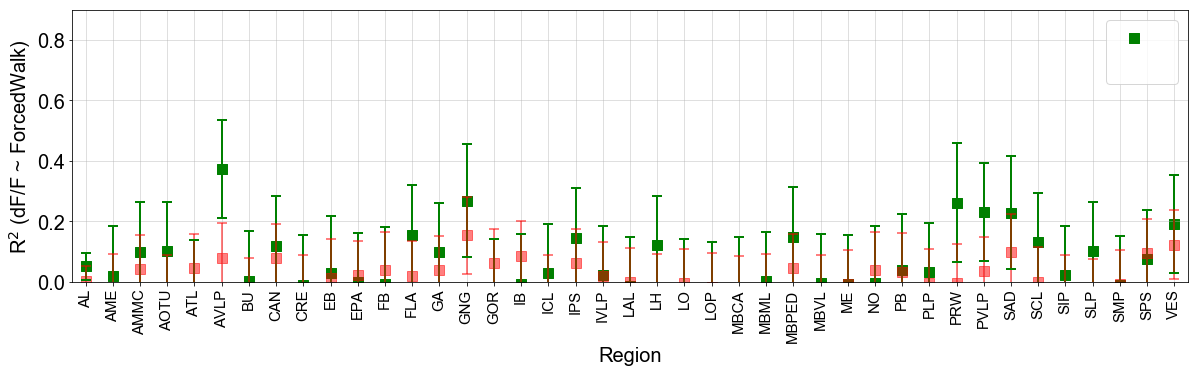

In [30]:
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20   

lin_reg = smf.ols(formula="R2ForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="Trh"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")


lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="Trh"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), alpha=0.5,
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")


plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ ForcedWalk)',fontsize=20)


plt.grid(b=None)
_ = ax.set_xticklabels(RegionNamesList, 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
plt.ylim([0,0.9])
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\Fig7R2TrhForcedWalkgRegionsReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

In [87]:
df1=Regionsdf[Regionsdf['R2Walk']>0].query('GAL4=="Nsyb" or GAL4=="GMR57C10"')

dfSF=df1.assign(R2=df1['R2Walk']).assign(Behavior='Walk').assign(Coef=df1['CoefWalk'])

df2=Regionsdf[Regionsdf['R2ForcedWalk']>0].query('GAL4=="Nsyb" or GAL4=="GMR57C10"')

dfSF=pd.concat([dfSF,df2.assign(R2=df2['R2ForcedWalk']).assign(Behavior='ForcedWalk').assign(Coef=df2['CoefForcedWalk'])])


In [88]:
df3=pd.read_csv('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\R2cut.csv',header=None)
df3 = pd.DataFrame.transpose(df3).astype(float)

In [89]:
df3[0]

0      0.027687
1      0.019369
2      0.014429
3      0.061433
4      0.029152
         ...   
370    0.009912
371    0.009717
372    0.011721
373    0.009579
374    0.008132
Name: 0, Length: 375, dtype: float64

In [90]:
dfSF

,index,0,FlyID,Templatefile,TSfile,expID,UAS,GAL4,Correspondance,RegionFile,...,CoefWalkoff,R2Groom,CoefGroom,R2Flail,CoefFlail,CoefForcedWalk,R2ForcedWalk,R2,Behavior,Coef
0,0,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,1,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,216,7f,Nsyb,",AL,KCab,AL,AVLPm,PI,PB-EB,SMPl-SIP,PN, ,AVLP...",Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031091,Walk,0.040917
0,0,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,1,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,216,7f,Nsyb,",AL,KCab,AL,AVLPm,PI,PB-EB,SMPl-SIP,PN, ,AVLP...",Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152920,Walk,0.044600
0,0,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,1,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,216,7f,Nsyb,",AL,KCab,AL,AVLPm,PI,PB-EB,SMPl-SIP,PN, ,AVLP...",Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.177435,Walk,0.050361
0,0,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,1,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,216,7f,Nsyb,",AL,KCab,AL,AVLPm,PI,PB-EB,SMPl-SIP,PN, ,AVLP...",Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.137746,Walk,0.095979
0,0,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,1,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,216,7f,Nsyb,",AL,KCab,AL,AVLPm,PI,PB-EB,SMPl-SIP,PN, ,AVLP...",Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072323,Walk,0.056506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,445,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,36,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,B903,6m,Nsyb,", ,GNG-SLP,AVLPprojm,PRW,AL, ,PNv,OL,OL,OL,OL...",Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-...,...,NaN,NaN,NaN,NaN,NaN,0.026033,0.131541,0.131541,ForcedWalk,0.026033
89,445,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,36,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,B903,6m,Nsyb,", ,GNG-SLP,AVLPprojm,PRW,AL, ,PNv,OL,OL,OL,OL...",Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-...,...,NaN,NaN,NaN,NaN,NaN,0.030109,0.227481,0.227481,ForcedWalk,0.030109
89,445,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,36,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,B903,6m,Nsyb,", ,GNG-SLP,AVLPprojm,PRW,AL, ,PNv,OL,OL,OL,OL...",Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-...,...,NaN,NaN,NaN,NaN,NaN,0.002877,0.000352,0.000352,ForcedWalk,0.002877
89,445,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,36,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,/media/NAS/Sophie/WalkProject/Pan-NeuronalCalc...,B903,6m,Nsyb,", ,GNG-SLP,AVLPprojm,PRW,AL, ,PNv,OL,OL,OL,OL...",Z:\GrunwaldKadow_group\Sophie\WalkProject\Pan-...,...,NaN,NaN,NaN,NaN,NaN,0.029551,0.062038,0.062038,ForcedWalk,0.029551


In [91]:
dfSF=pd.concat([dfSF,df3.assign(R2=df3[0]).assign(Behavior='ForcedWalkCut')])


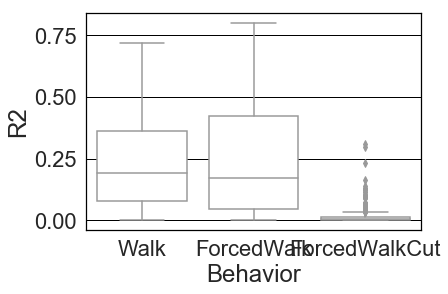

In [92]:
sns.boxplot(x='Behavior',y='R2',data=dfSF,color='w')

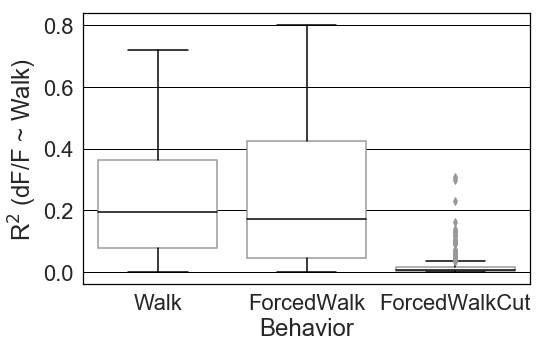

In [101]:
fig, ax = plt.subplots(figsize=(8, 5))
df3=dfSF
ax=sns.boxplot(x='Behavior',y='R2',data=df3,color='w')
for j in range(18):
     ax.lines[j].set_color('black')
        
plt.ylabel('R$^2$ (dF/F ~ Walk)')

plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\Fig7BoxR2RegionsAllBehaviorp.svg')

In [102]:
dfWalkR2=df3.loc[df3['Behavior']=='Walk'].groupby('FlyID').mean()
dfFlailR2=df3.loc[df3['Behavior']=='ForcedWalk'].groupby('FlyID').mean()
dfGroomR2=df3.loc[df3['Behavior']=='ForcedWalkcut'].groupby('FlyID').mean()
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\BehaviorPairR2_pvaluesperfly.txt', 'w') as f:

        f.write('Walk vs ForcedWalk')
        f.write(':') 
        f.write("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfWalkR2.loc[dfWalkR2['R2']>0]['R2'], dfFlailR2.loc[dfFlailR2['R2']>0]['R2']).pvalue*3))        
        f.write('\n')
        print("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfWalkR2.loc[dfWalkR2['R2']>0]['R2'], dfFlailR2.loc[dfFlailR2['R2']>0]['R2']).pvalue*3))

        f.write('Walk vs Cut')
        f.write(':') 
        f.write("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfWalkR2.loc[dfWalkR2['R2']>0]['R2'],dfGroomR2.loc[dfGroomR2['R2']>0]['R2']).pvalue*3))        
        f.write('\n')
        print("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfWalkR2.loc[dfWalkR2['R2']>0]['R2'], dfGroomR2.loc[dfGroomR2['R2']>0]['R2']).pvalue*3))

        f.write('ForcedWalk vs Cut')
        f.write(':') 
        f.write("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfFlailR2.loc[dfFlailR2['R2']>0]['R2'],dfGroomR2.loc[dfGroomR2['R2']>0]['R2']).pvalue*3))        
        f.write('\n')
        print("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfFlailR2.loc[dfFlailR2['R2']>0]['R2'],dfGroomR2.loc[dfGroomR2['R2']>0]['R2']).pvalue*3))



0.8551236089
0.0000000000
0.0000000000


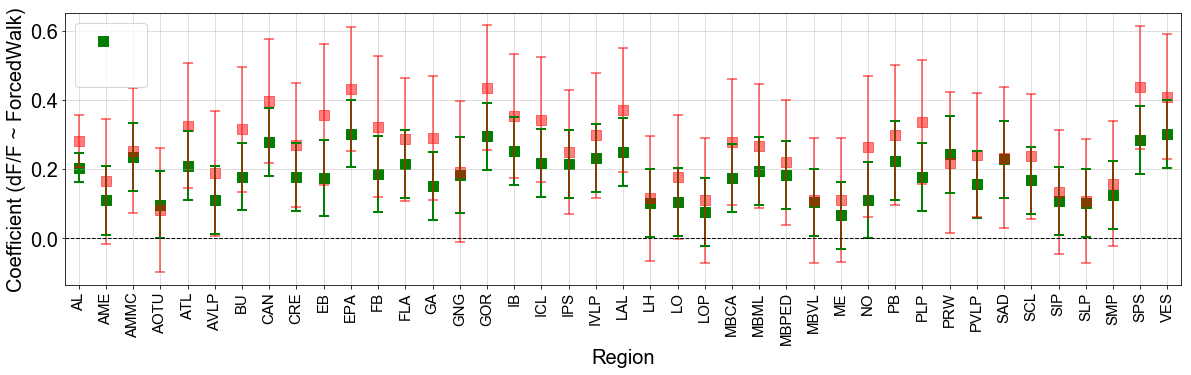

In [32]:
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20   

lin_reg = smf.ols(formula="CoefForcedWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="TH"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")


lin_reg = smf.ols(formula="CoefWalk ~ RegionNames+UAS", data=Regionsdf.query('GAL4=="TH"')).fit() 
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]
err_seriesgsum=[(a+err_series[0]) for a in err_series]
err_seriesgsum[0]=err_series[0]
coef_series=lin_reg.params.values
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_df = pd.DataFrame({'coef': coef_series[range(41)],
                         'err': np.array(err_seriesgsum)[range(41)],
                        #'err': np.array(err_seriesgsum)[L2],
                        'varname': err_series.index.values[range(41)]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', alpha=0,
            yerr='err', 
            error_kw=dict(ecolor='r', lw=2, capsize=5, capthick=2,transform=trans+offset(0),alpha=0.5),
            label='')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), alpha=0.5,
          y=coef_df['coef'], color='r',label="Mixed model for fly ID")


plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ ForcedWalk)',fontsize=20)


plt.grid(b=None)
_ = ax.set_xticklabels(RegionNamesList, 
                      rotation=90, fontsize=15)
ax.grid(True,alpha=0.5)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure7\CoefTHForcedWalkgRegionsReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

In [33]:
Compdf.query('R2ForcedWalk>0')['expID'].unique()

array(['B322', 'B323', 'B1045', 'B1049', 'B1000', 'B675', 'B676', 'B1003',
       'B679', 'B902', 'B903', 'B905', 'B377', 'B378', 'B765', 'B766',
       'B767', 'B768', 'B1055', 'B343', 'B350', 'B351', 'B352', 'B353',
       'B355', 'B358', 'B701', 'B1248', 'B1251', 'B1260', 'B1262',
       'B1269'], dtype=object)

In [34]:
Compdf.query('R2ForcedWalk>0')['GAL4'].unique()

array(['GMR57C10', 'Nsyb', 'TH', 'Trh', 'TDC'], dtype=object)

In [35]:
Compdf.query('R2ForcedWalk>0 and GAL4=="Nsyb"')['FlyID'].unique()

array([25, 28, 29, 30, 36], dtype=int64)

In [36]:
Compdf.query('R2ForcedWalk>0 and GAL4=="GMR57C10"')['FlyID'].unique()

array([22, 26, 27], dtype=int64)

In [37]:
Compdf.query('R2ForcedWalk>0 and GAL4=="Nsyb"')['expID'].unique() 

array(['B1000', 'B675', 'B676', 'B1003', 'B679', 'B902', 'B903', 'B905'],
      dtype=object)

In [38]:
Compdf.query('R2ForcedWalk>0 and GAL4=="Trh"')['expID'].unique()

array(['B343', 'B350', 'B351', 'B352', 'B353', 'B355', 'B358'],
      dtype=object)

In [39]:
Compdf.query('R2ForcedWalk>0 and GAL4=="Trh"')['FlyID'].unique()

array([ 98, 100, 101], dtype=int64)

why so little Trh? add B731/732 and B733 and B743 in regions

In [40]:
Regionsdf.query('R2ForcedWalk>0 and GAL4=="Trh"')['expID'].unique()

array(['B351', 'B352', 'B353', 'B355', 'B358'], dtype=object)

In [41]:
Regionsdf.query('R2ForcedWalk>0 and GAL4=="Trh"')['FlyID'].unique()

array([100, 101], dtype=int64)

In [42]:
Compdf.query('R2ForcedWalk>0 and GAL4=="TDC"')['FlyID'].unique()

array([112, 120, 121, 122, 123, 126], dtype=int64)

In [43]:
Compdf.query('R2ForcedWalk>0 and GAL4=="TH"')['FlyID'].unique()

array([80, 84, 85], dtype=int64)

In [44]:
Compdf.query('R2ForcedWalk>0 and GAL4=="TDC"')['expID'].unique()

array(['B701', 'B1248', 'B1251', 'B1260', 'B1262', 'B1269'], dtype=object)

In [45]:
Compdf.query('R2ForcedWalk>0 and GAL4=="GMR47C10"')['expID'].unique()

array([], dtype=object)

In [46]:
CompOrder=pd.read_csv('Z:\GrunwaldKadow_group\Sophie\WalkProject\AllCompIDOrderedVF.txt',header=None)

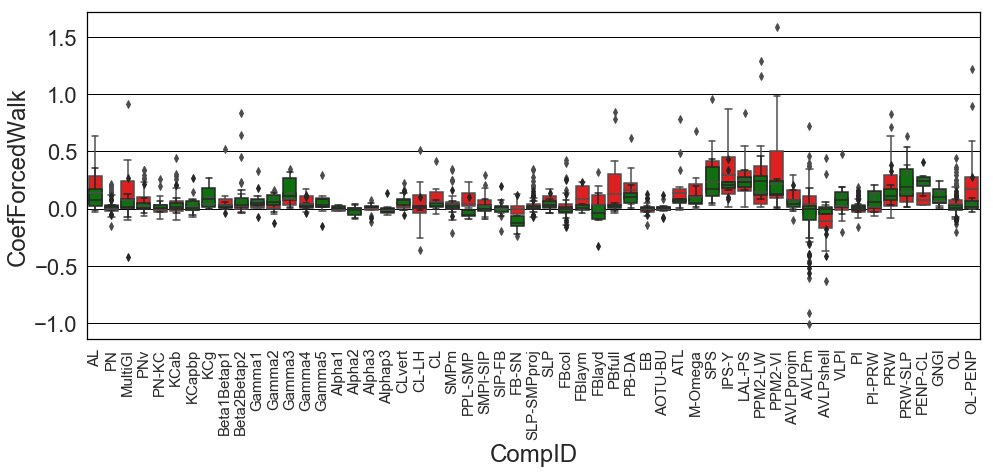

In [47]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('CoefForcedWalk!=0')
df3=df3[df3['CoefForcedWalk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['CoefForcedWalk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoefWalk',data=Compdf,color='r',order=NewOrder)
b = sns.boxplot(x='CompID',y='CoefForcedWalk',data=df3,color='g',order=NewOrder)
#for i,box in enumerate(b.artists):
   # box.set_edgecolor('black')
   # box.set_facecolor('green')

    # iterate over whiskers and median lines
   # for j in range(6*i,6*(i+1)):
    #     b.lines[j].set_color('black')


plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\CoefForcedPANWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

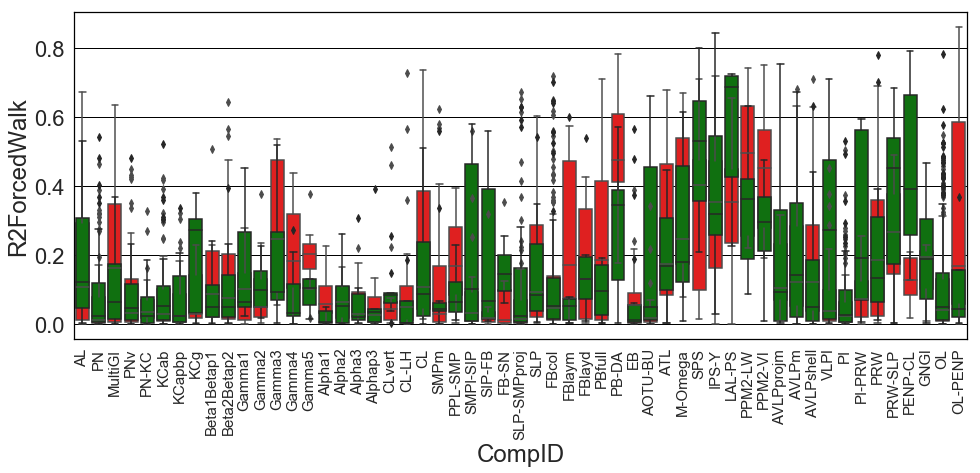

In [48]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('CoefForcedWalk!=0')
df3=df3[df3['CoefForcedWalk'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['CoefForcedWalk'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2Walk',data=Compdf,color='r',order=NewOrder)
b = sns.boxplot(x='CompID',y='R2ForcedWalk',data=df3,color='g',order=NewOrder)
#for i,box in enumerate(b.artists):
   # box.set_edgecolor('black')
   # box.set_facecolor('green')

    # iterate over whiskers and median lines
   # for j in range(6*i,6*(i+1)):
    #     b.lines[j].set_color('black')


plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\R2ForcedPANWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

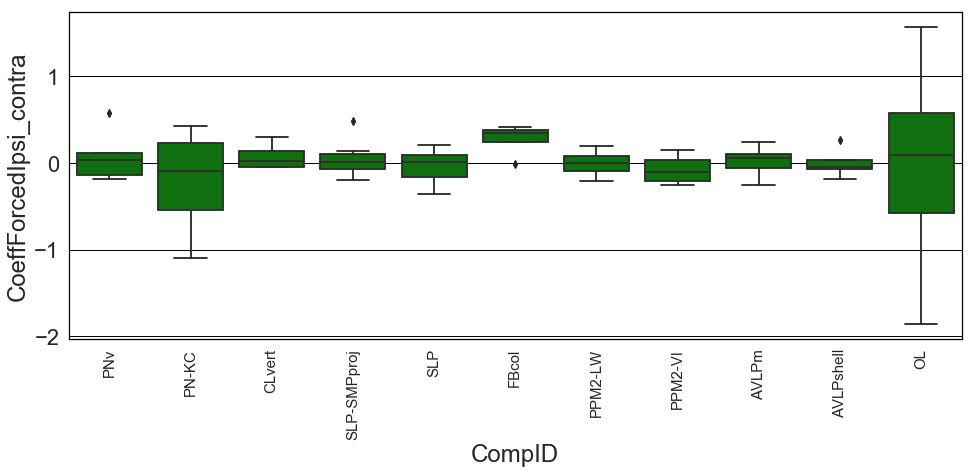

In [49]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('CoeffForcedIpsi_contra!=0')
df3=df3[df3['CoeffForcedIpsi_contra'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['CoeffForcedIpsi_contra'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='CoeffForcedIpsi_contra',data=Compdf,color='r',order=NewOrder)
b = sns.boxplot(x='CompID',y='CoeffForcedIpsi_contra',data=df3,color='g',order=NewOrder)
#for i,box in enumerate(b.artists):
   # box.set_edgecolor('black')
   # box.set_facecolor('green')

    # iterate over whiskers and median lines
   # for j in range(6*i,6*(i+1)):
    #     b.lines[j].set_color('black')


plt.xticks(rotation=90)
plt.xticks(fontsize=15)
#.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\R2ForcedTurnPANWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [50]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))
df3=Compdf
df3=df3.query('R2ForcedIpsi_contra!=0')
df3=df3[df3['R2ForcedIpsi_contra'].notna()]
#df3=df3.dropna()
#df3=df3.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
df3=df3[df3['R2ForcedIpsi_contra'].astype(bool)]
df3=df3.groupby('CompID').filter(lambda x : len(x)>3)

NewOrder=[]

for i in range(len(list(CompOrder[0]))):
    if list(CompOrder[0])[i] in df3['CompID'].unique():
        NewOrder.append(list(CompOrder[0])[i])


b = sns.boxplot(x='CompID',y='R2ForcedIpsi_contra',data=Compdf,color='r',order=NewOrder)
b = sns.boxplot(x='CompID',y='R2ForcedIpsi_contra',data=df3,color='g',order=NewOrder)
#for i,box in enumerate(b.artists):
   # box.set_edgecolor('black')
   # box.set_facecolor('green')

    # iterate over whiskers and median lines
   # for j in range(6*i,6*(i+1)):
    #     b.lines[j].set_color('black')


plt.xticks(rotation=90)
plt.xticks(fontsize=15)
#.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\R2ForcedTurnPANWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

UndefinedVariableError: name 'R2ForcedIpsi_contra' is not defined

<Figure size 1152x432 with 0 Axes>

In [ ]:
df=df3
L=len(NewOrder)
pval=np.ones(L)

i=0
for compid in NewOrder:
    df2=df.loc[df['CompID']==compid]
    pval[i]=scipy.stats.wilcoxon(df2['R2ForcedWalk']).pvalue
    i=i+1
    
pvalcorr=sm.stats.multitest.multipletests(pval, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)

i=0
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure6\CoefCompForcedWalktoZero.txt', 'w') as f:
    for compid in NewOrder:
        f.write(compid)
        f.write(':') 
        f.write(str(pvalcorr[1][i]))        
        f.write('\n')
        print(compid)
        print(pvalcorr[1][i])
        i=i+1
        
        
